# Keras -- MLPs on MNIST

In [0]:
# if you keras is not using tensorflow as backend set "KERAS_BACKEND=tensorflow" use this command
from keras.utils import np_utils 
from keras.datasets import mnist 
import seaborn as sns
from keras.initializers import RandomNormal
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time


Using TensorFlow backend.


In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    plt.show()


In [0]:
# the data, shuffled and split between train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [0]:
print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d, %d)"%(X_train.shape[1], X_train.shape[2]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d, %d)"%(X_test.shape[1], X_test.shape[2]))

Number of training examples : 60000 and each image is of shape (28, 28)
Number of training examples : 10000 and each image is of shape (28, 28)


In [0]:
# if you observe the input shape its 3 dimensional vector
# for each image we have a (28*28) vector
# we will convert the (28*28) vector into single dimensional vector of 1 * 784 

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]*X_train.shape[2]) 
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]*X_test.shape[2]) 

In [0]:
# after converting the input images from 3d to 2d vectors

print("Number of training examples :", X_train.shape[0], "and each image is of shape (%d)"%(X_train.shape[1]))
print("Number of training examples :", X_test.shape[0], "and each image is of shape (%d)"%(X_test.shape[1]))

Number of training examples : 60000 and each image is of shape (784)
Number of training examples : 10000 and each image is of shape (784)


In [0]:
# An example data point
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [0]:
# if we observe the above matrix each cell is having a value between 0-255
# before we move to apply machine learning algorithms lets try to normalize the data
# X => (X - Xmin)/(Xmax-Xmin) = X/255

X_train = X_train/255
X_test = X_test/255

In [0]:
# example data point after normlizing
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [0]:
# here we are having a class number for each image
print("Class label of first image :", y_train[0])

# lets convert this into a 10 dimensional vector
# ex: consider an image is 5 convert it into 5 => [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
# this conversion needed for MLPs 

Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

print("After converting the output into a vector : ",Y_train[0])

Class label of first image : 5
After converting the output into a vector :  [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


**Softmax classifier**

In [0]:
from keras.models import Sequential 
from keras.layers import Dense, Activation 


In [0]:
# some model parameters

output_dim = 10
input_dim = X_train.shape[1]

batch_size = 156
nb_epoch = 20

In [0]:
# start building a model
model = Sequential()

# The model needs to know what input shape it should expect. 
# For this reason, the first layer in a Sequential model 
# (and only the first, because following layers can do automatic shape inference)
# needs to receive information about its input shape. 
# you can use input_shape and input_dim to pass the shape of input

# output_dim represent the number of nodes need in that layer
# here we have 10 nodes

model.add(Dense(output_dim, input_dim=input_dim, activation='softmax'))

In [0]:
# Before training a model, you need to configure the learning process, which is done via the compile method

# It receives three arguments:
# An optimizer. This could be the string identifier of an existing optimizer , https://keras.io/optimizers/
# A loss function. This is the objective that the model will try to minimize., https://keras.io/losses/
# A list of metrics. For any classification problem you will want to set this to metrics=['accuracy'].  https://keras.io/metrics/


# Note: when using the categorical_crossentropy loss, your targets should be in categorical format 
# (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except 
# for a 1 at the index corresponding to the class of the sample).

# that is why we converted out labels into vectors

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

# Keras models are trained on Numpy arrays of input data and labels. 
# For training a model, you will typically use the  fit function

# fit(self, x=None, y=None, batch_size=None, epochs=1, verbose=1, callbacks=None, validation_split=0.0, 
# validation_data=None, shuffle=True, class_weight=None, sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
# validation_steps=None)

# fit() function Trains the model for a fixed number of epochs (iterations on a dataset).

# it returns A History object. Its History.history attribute is a record of training loss values and 
# metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

# https://github.com/openai/baselines/issues/20

history = model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test)) 


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.3658 - acc: 0.6811 - val_loss: 0.8797 - val_acc: 0.8261
Epoch 2/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.7722 - acc: 0.8353 - val_loss: 0.6500 - val_acc: 0.8575
Epoch 3/20
60000/60000 [==============================] - 1s 17us/step - loss: 0.6268 - acc: 0.8549 - val_loss: 0.5579 - val_acc: 0.8707
Epoch 4/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.5570 - acc: 0.8647 - val_loss: 0.5066 - val_acc: 0.8787
Epoch 5/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.5147 - acc: 0.8713 - val_loss: 0.4728 - val_acc: 0.8853
Epoch 6/20
60000/60000 [==============================] - 1s 19us/step - loss: 0.4856 - acc: 0.8768 - val_loss: 0.4492 - val_acc: 0.8883
Epoch 7/20
60000/60000 [==============================] - 1s 18us/step - loss: 0.4641 - acc: 0.8810 - val_loss: 0.4309 - val_acc

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

Test score: 0.3455672636508942
Test accuracy: 0.9051


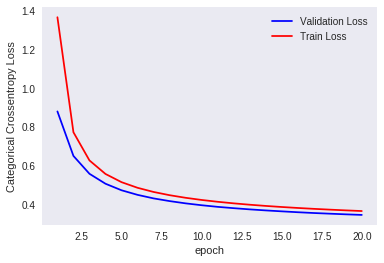

In [0]:
rfig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)


# MLP + ReLU +Adam

In [0]:
# Multilayer perceptron

# https://arxiv.org/pdf/1707.09725.pdf#page=95
# for relu layers
# If we sample weights from a normal distribution N(0,σ) we satisfy this condition with σ=√(2/(ni). 
# h1 =>  σ=√(2/(fan_in) = 0.059  => N(0,σ) = N(0,0.059)
# h2 =>  σ=√(2/(fan_in) = 0.113  => N(0,σ) = N(0,0.113)

model_relu = Sequential()
model_relu.add(Dense(556, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.059, seed=None)))
model_relu.add(Dense(156, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.113, seed=None)) )
model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 556)               436460    
_________________________________________________________________
dense_3 (Dense)              (None, 156)               86892     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1570      
Total params: 524,922
Trainable params: 524,922
Non-trainable params: 0
_________________________________________________________________


In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.1708 - acc: 0.9490 - val_loss: 0.1148 - val_acc: 0.9631
Epoch 2/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0760 - acc: 0.9766 - val_loss: 0.0946 - val_acc: 0.9722
Epoch 3/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0483 - acc: 0.9849 - val_loss: 0.0710 - val_acc: 0.9794
Epoch 4/20
60000/60000 [==============================] - 7s 116us/step - loss: 0.0334 - acc: 0.9893 - val_loss: 0.0650 - val_acc: 0.9804
Epoch 5/20
60000/60000 [==============================] - 7s 115us/step - loss: 0.0235 - acc: 0.9928 - val_loss: 0.0699 - val_acc: 0.9789
Epoch 6/20
60000/60000 [==============================] - 7s 110us/step - loss: 0.0182 - acc: 0.9941 - val_loss: 0.0652 - val_acc: 0.9818
Epoch 7/20
60000/60000 [==============================] - 7s 113us/step - loss: 0.0131 - acc: 0.9959 - val_loss: 0.0688 - 

Test score: 0.09683581481487936
Test accuracy: 0.9802


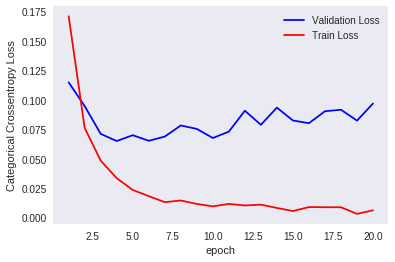

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Input(784)+ReLu(580)+ReLu(325)+ReLu(125)+Softmax(Output(10))

In [0]:
# h1 =>  σ=√(2/(fan_in) = 0.058  => N(0,σ) = N(0,0.058)
# h2 =>  σ=√(2/(fan_in) = 0.078  => N(0,σ) = N(0,0.078)
# h3 =>  σ=√(2/(fan_in) = 0.126  => N(0,σ) = N(0,0.126)

from keras.layers.normalization import BatchNormalization
from keras.layers import Dropout


model_relu = Sequential()
model_relu.add(Dense(580, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.058, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(325, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.078, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(125, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.126, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 580)               455300    
_________________________________________________________________
batch_normalization_2 (Batch (None, 580)               2320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 580)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 325)               188825    
_________________________________________________________________
batch_normalization_3 (Batch (None, 325)               1300      
_________________________________________________________________
dropout_2 (Dropout)          (None, 325)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 125)               40750     
__________

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 14s 229us/step - loss: 0.6143 - acc: 0.8121 - val_loss: 0.1724 - val_acc: 0.9478
Epoch 2/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.2568 - acc: 0.9231 - val_loss: 0.1223 - val_acc: 0.9628
Epoch 3/20
60000/60000 [==============================] - 12s 206us/step - loss: 0.1946 - acc: 0.9435 - val_loss: 0.1054 - val_acc: 0.9679
Epoch 4/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.1592 - acc: 0.9524 - val_loss: 0.0864 - val_acc: 0.9738
Epoch 5/20
60000/60000 [==============================] - 12s 207us/step - loss: 0.1401 - acc: 0.9586 - val_loss: 0.0835 - val_acc: 0.9731
Epoch 6/20
60000/60000 [==============================] - 13s 209us/step - loss: 0.1235 - acc: 0.9635 - val_loss: 0.0730 - val_acc: 0.9778
Epoch 7/20
60000/60000 [==============================] - 13s 211us/step - loss: 0.1173 - acc: 0.9649 - val_loss: 0.

Test score: 0.055547566109968464
Test accuracy: 0.9837


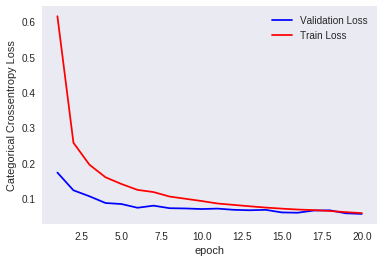

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

# Input(784)+ReLu(658)+ReLu(525)+ReLu(410)+ReLu(350)+ReLu(150)+Output(10

In [0]:
# h1 =>  σ=√(2/(fan_in) = 0.055  => N(0,σ) = N(0,0.055)
# h2 =>  σ=√(2/(fan_in) = 0.061  => N(0,σ) = N(0,0.061)
# h3 =>  σ=√(2/(fan_in) = 0.069  => N(0,σ) = N(0,0.069)
# h4 =>  σ=√(2/(fan_in) = 0.075  => N(0,σ) = N(0,0.075)
# h5 =>  σ=√(2/(fan_in) = 0.115  => N(0,σ) = N(0,0.115)



model_relu = Sequential()
model_relu.add(Dense(658, activation='relu', input_shape=(input_dim,), kernel_initializer=RandomNormal(mean=0.0, stddev=0.055, seed=None)))
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(525, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.061, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(410, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.069, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(350, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.075, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(150, activation='relu', kernel_initializer=RandomNormal(mean=0.0, stddev=0.115, seed=None)) )
model_relu.add(BatchNormalization())
model_relu.add(Dropout(0.5))

model_relu.add(Dense(output_dim, activation='softmax'))

model_relu.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 658)               516530    
_________________________________________________________________
batch_normalization_5 (Batch (None, 658)               2632      
_________________________________________________________________
dropout_4 (Dropout)          (None, 658)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 525)               345975    
_________________________________________________________________
batch_normalization_6 (Batch (None, 525)               2100      
_________________________________________________________________
dropout_5 (Dropout)          (None, 525)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 410)               215660    
__________

In [0]:
model_relu.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model_relu.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 25s 412us/step - loss: 0.8993 - acc: 0.7234 - val_loss: 0.2221 - val_acc: 0.9372
Epoch 2/20
60000/60000 [==============================] - 23s 378us/step - loss: 0.3052 - acc: 0.9110 - val_loss: 0.1521 - val_acc: 0.9568
Epoch 3/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.2283 - acc: 0.9334 - val_loss: 0.1179 - val_acc: 0.9661
Epoch 4/20
60000/60000 [==============================] - 23s 377us/step - loss: 0.1902 - acc: 0.9451 - val_loss: 0.1105 - val_acc: 0.9682
Epoch 5/20
60000/60000 [==============================] - 23s 379us/step - loss: 0.1588 - acc: 0.9544 - val_loss: 0.1029 - val_acc: 0.9716
Epoch 6/20
60000/60000 [==============================] - 23s 384us/step - loss: 0.1435 - acc: 0.9587 - val_loss: 0.0935 - val_acc: 0.9734
Epoch 7/20
60000/60000 [==============================] - 23s 381us/step - loss: 0.1310 - acc: 0.9620 - val_loss: 0.

Test score: 0.062496218884619884
Test accuracy: 0.9846


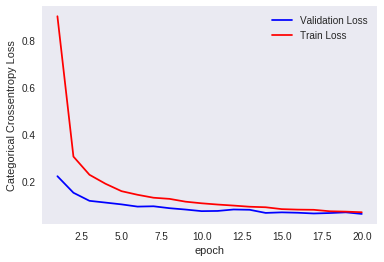

In [0]:
score = model_relu.evaluate(X_test, Y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])

fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')

# list of epoch numbers
x = list(range(1,nb_epoch+1))

# print(history.history.keys())
# dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])
# history = model_drop.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch, verbose=1, validation_data=(X_test, Y_test))

# we will get val_loss and val_acc only when you pass the paramter validation_data
# val_loss : validation loss
# val_acc : validation accuracy

# loss : training loss
# acc : train accuracy
# for each key in histrory.histrory we will have a list of length equal to number of epochs

vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)